## Introduction

This tutorial will introduce you to the Random Forest Algorithm. The Random Forest Algorithm is one of the most popular algorithms used in data science classification tasks. It gives the user the advantage of using the Single Decision Tree model, but without the high variance and bias often associated with them. Compared to other classification algorithms, it doesn't overfit data, can be used for classification and regression tasks, and can be used to identify the most important features in an available training set. It is also advantageous in that it is able to process high amounts of data with high accuracy. 

From banking to medicine to ecommerce, te Random Forest Algorithm has numerous applications in different fields. In Computational Biology, Random Forests have been used to classify cancer cells based on their gene expression. Classifying cancer cells based on gene expression is a supervised classification problem, and the RFA allows researchers to not only classify the cells, but as a bonus have the genes (features) ranked in order of importance as an implicit part of the algorithm.

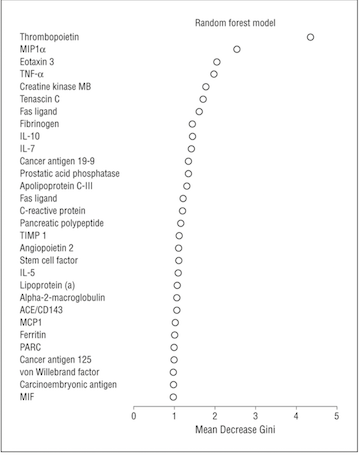


Here is the variable importance plot of protein biomarkers measured by the random forest built from the training set of protein data. The RFA allowed researchers to rank how important different proteins were to the development of Alzheimer's Disease *("A Serum Protein-Based Algorithm for the Detection of Alzheimer Disease")*

### Tutorial Content

In this tutorial we will explain the Random Forest Algorithm, and then run through an example of the algorithm applied to Pittsburgh weather data from 2017 using the [NOAA Climate Data Online tool](https://www.ncdc.noaa.gov/cdo-web/). The NOAA tool is easy to use and yield high-quality that can be easily downloaded into CSV files to be parsed by python.

We will cover the following topics in this tutorial
- [Back to the Basics: Decision Trees](#Back-to-the-Basics:-Decision-Trees)
- [So What's a Random Forest?](#So-What's-a-Random-Forest?)
- [Example: Pittsburgh Weather Data](#Example-Pittsburgh-Weather-Data)
- [Installing Libraries](#Installing-Libraries)


## Back to the Basics: Decision Trees

To understand Random Forests, we must first learn about the their basic building block: decision trees. Even if you have never formally learned about decision trees, we use them so frequently in our everyday lives that you will recognize the concept.

Let's illustrate the example with a question you most likely ask everyday- What should I eat for lunch? 
In order to answer the "where to eat?" question, we need to work through a list of queries we would ask ourselves. We will first limit our range of locations to Pittsburgh, cause we CMU students presumably don't have the time or resources to go to another city for a casual lunch. We will answer a series of questions to reduce our range to a single location as the end decision. 

The first step is to think of the questions that are relevant to the problems statement. Since how we are likely to go for lunch is highly dependent on the time we have for lunch, the first question we may ask is: how much time do we have for lunch? If we have only 10 minutes, we may want to limit our search to on campus food. If we have more than 2 hours, we can expand our search to the entire Pittsburgh area. This question was good because it allows us to cut the range of locations considerably. Next, we may follow up with: what cuisine would we like to eat? This question further restricts our range of consideration to only restaurants that fit our cuisine. We can ask further questions like- Do we have any food restrictions or allergens? What cuisine did we last have? How much money can we afford for lunch? Answering these series of questions can narrow our search until we find a single prediction of the restaurant we would most likely eat at. 

Below is a diagram illustrating the decision tree for the queries asked. Note that only two questions were asked to narrow the decision down- in real decision trees, many more questions are used to narrow the range of consideration. Also note that for every question, there is a true and false component. 


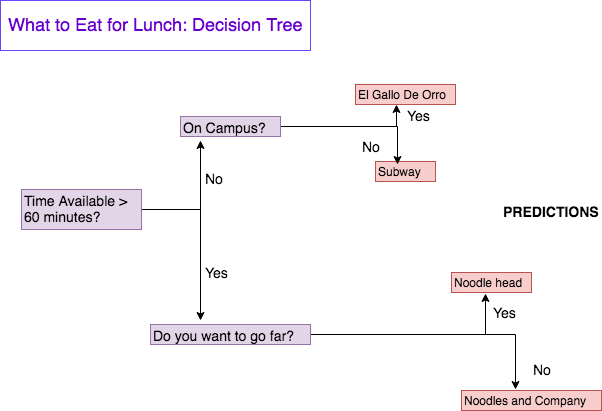

While we estimated the range of consideration based on our prior knowledge of the world, decision trees don't have that knowledge. They  wouldn't know that having less time to eat meant you couldn't travel as far. The model must learn about the problem from data given to it and be taught the relationships between different experiences. Learning to map data to output is part of training our model. We give data relevant to the problem and the decision tree forms structures by calculating the best questions to ask in order to make the most accurate estimates. After enough data, the decision tree will surpass human abilities.


## So What's a Random Forest?

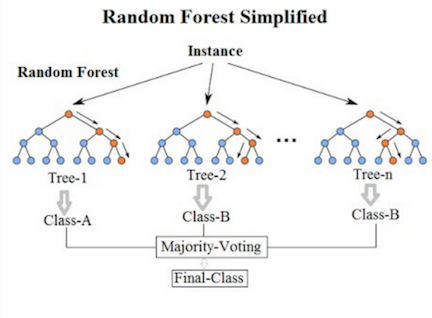

Like humans, individual decisions trees have high variance because estimates might be widely spread around the accurate prediction. Different decision trees are trained on different sets of data and therefore may predict different things. Random Forests take many decision trees and integrate them into one model so that the predictions are more averaged (more samples). By combining many different Decision Trees, we have access to more knowledge overall. Also, even if there are a couple of decision trees who were trained on completely biased and innacurate data, we can still count on the Random Forest to make reasonable predictions because the outlier won't make much of a difference in the long run.

The following is pseudocode explaining the algorithm

In [118]:
# REQUIRES: S is a training set = (x1, y1), . . . ,(xn, yn), F is a feature list, 
# B is the number of decision trees in the forest 
def RandomForest(S , F): 
    H = []
    for i in range(len(B)):
        S = rand(B) # choose random decision tree
        h = RandomizedTreeLearn(S,F) # learn from tree
        H = H.append(h)
    return H

def RandomizedTreeLearn(S , F):
    for i in nodes:
        f = chooseSubset(F)
        split_best() #Determine best features in f and split based on that 
    return tree_learned

## Example: Pittsburgh Weather Data

For this example, data was retrieved from Pittsburgh, PA from 2016 using the [NOAA Climate Data Online Tool](https://www.ncdc.noaa.gov/cdo-web/). The tool allows you to give different parameters (city, type of weather data, time interval) and then gives you the data in a csv form.

### Installing Libraries

In [119]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import pydot
import matplotlib.pyplot as plt
import datetime

### Loading Data

In [120]:
# Read in data as pandas dataframe and display first 5 rows
features = pd.read_csv('temps_pittsburgh.csv')
features.head(10)

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2016,1,1,Fri,34,35,37.5,36,29
1,2016,1,2,Sat,35,36,37.4,34,61
2,2016,1,3,Sun,36,34,37.3,34,56
3,2016,1,4,Mon,34,34,37.3,32,53
4,2016,1,5,Tues,34,32,37.2,24,41
5,2016,1,6,Wed,32,24,37.2,26,40
6,2016,1,7,Thurs,24,26,37.1,42,38
7,2016,1,8,Fri,26,42,37.1,44,34
8,2016,1,9,Sat,42,44,37.0,43,47
9,2016,1,10,Sun,44,43,37.0,54,49


The 'temps_pittsburgh.csv' file contains different features.

year: The year the data was taken from

month: the month the data was taken from

day: the day the data was taken from

temp_2: the max temperature from 2 days prior

temp_1: the max temperature from 1 day prior

average: the average temperature of that data over many years

actual: what the actual max temperature was

friend: a random number (later we will be able to show that this number is insignificant)

In [121]:
# Shows if there is any missing data 
# As long as there are no zeroes in the measurement columns, the data has relatively good quality
features.describe()

,year,month,day,temp_2,temp_1,average,actual,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,63.718391,63.706897,60.924138,63.681034,60.034483
std,0.0,3.498380,8.772982,19.661868,19.680452,16.452823,19.724149,15.626179
min,2016.0,1.000000,1.000000,11.000000,11.000000,36.900000,11.000000,28.000000
25%,2016.0,3.000000,8.000000,49.000000,49.000000,44.700000,49.000000,47.750000
50%,2016.0,6.000000,15.000000,67.000000,67.000000,62.100000,67.000000,60.000000
75%,2016.0,10.000000,23.000000,80.250000,80.250000,76.725000,80.250000,71.000000
max,2016.0,12.000000,31.000000,92.000000,92.000000,83.500000,92.000000,95.000000


### Convert Categorical Data to Numerical (Days of the Week)

In [122]:
# Instead of having strings that tell the day of the week, we can convert to numerical data
features = pd.get_dummies(features)
print(features.head(5))
print('The shape of our features is:', features.shape)

   year  month  day  temp_2  temp_1  average  actual  friend  week_Fri  \
0  2016      1    1      34      35     37.5      36      29         1   
1  2016      1    2      35      36     37.4      34      61         0   
2  2016      1    3      36      34     37.3      34      56         0   
3  2016      1    4      34      34     37.3      32      53         0   
4  2016      1    5      34      32     37.2      24      41         0   

   week_Mon  week_Sat  week_Sun  week_Thurs  week_Tues  week_Wed  
0         0         0         0           0          0         0  
1         0         1         0           0          0         0  
2         0         0         1           0          0         0  
3         1         0         0           0          0         0  
4         0         0         0           0          1         0  
The shape of our features is: (348, 15)


### Labeling Features

In [123]:
# Labels are the values we want to predict
labels = np.array(features['actual'])

# Remove the labels from the features
features= features.drop('actual', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

### Training the Set

In [124]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25,
                                                                           random_state = 42)

In [125]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (261, 14)
Training Labels Shape: (261,)
Testing Features Shape: (87, 14)
Testing Labels Shape: (87,)


### Baseline Predictions

In [126]:
# The baseline predictions are the historical averages
base_preds = test_features[:, feature_list.index('average')]

# Baseline errors- filtering out the Nan
baseline_errors = abs(base_preds - test_labels)
baseline_errors = baseline_errors[~np.isnan(baseline_errors)]

print('Average baseline error: ', round(np.mean(baseline_errors), 2), 'degrees.')

Average baseline error:  8.85 degrees.


### Training the Forest

In [127]:
# Instantiate model 
rfr = RandomForestRegressor(n_estimators= 1000, random_state=42)
print(train_features)
# Train the model on training data
rfr.fit(train_features, train_labels);

[[  2.01600000e+03   9.00000000e+00   1.90000000e+01 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  2.01600000e+03   4.00000000e+00   1.40000000e+01 ...,   1.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  2.01600000e+03   7.00000000e+00   3.00000000e+01 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  2.01600000e+03   4.00000000e+00   1.90000000e+01 ...,   0.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [  2.01600000e+03   1.00000000e+01   1.40000000e+01 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  2.01600000e+03   4.00000000e+00   1.50000000e+01 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]


### Making Predictions

The mean absolute error (MAE) is a measure of difference between two continuous variables. We can calculate it to see how well our predictions fare. It tells you the "average difference' between the two variables. Our MAE is around 6 degrees, which is not bad. We also calculate the mean error, which is the average of the errors. We can use that to give an approximation of how accurate our data is.

In [128]:
# Use the forest's predict method on the test data
predictions = rfr.predict(test_features)

# Calculate the absolute errors
err = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


Mean Absolute Error: 6.21 degrees.


In [129]:
# Calculate mean error
mean_error = 100 * (err / test_labels)

# Display the accuracy of the prediction
accuracy = 100 - np.mean(mean_error)
print('Accuracy:', accuracy, '%.')

Accuracy: 88.6688052531 %.


### Decision Tree Visualization

In [130]:
# Pull out one tree from the forest
dec_tree = rfr.estimators_[5]

# Export the image to a dot file
export_graphviz(dec_tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png'); 

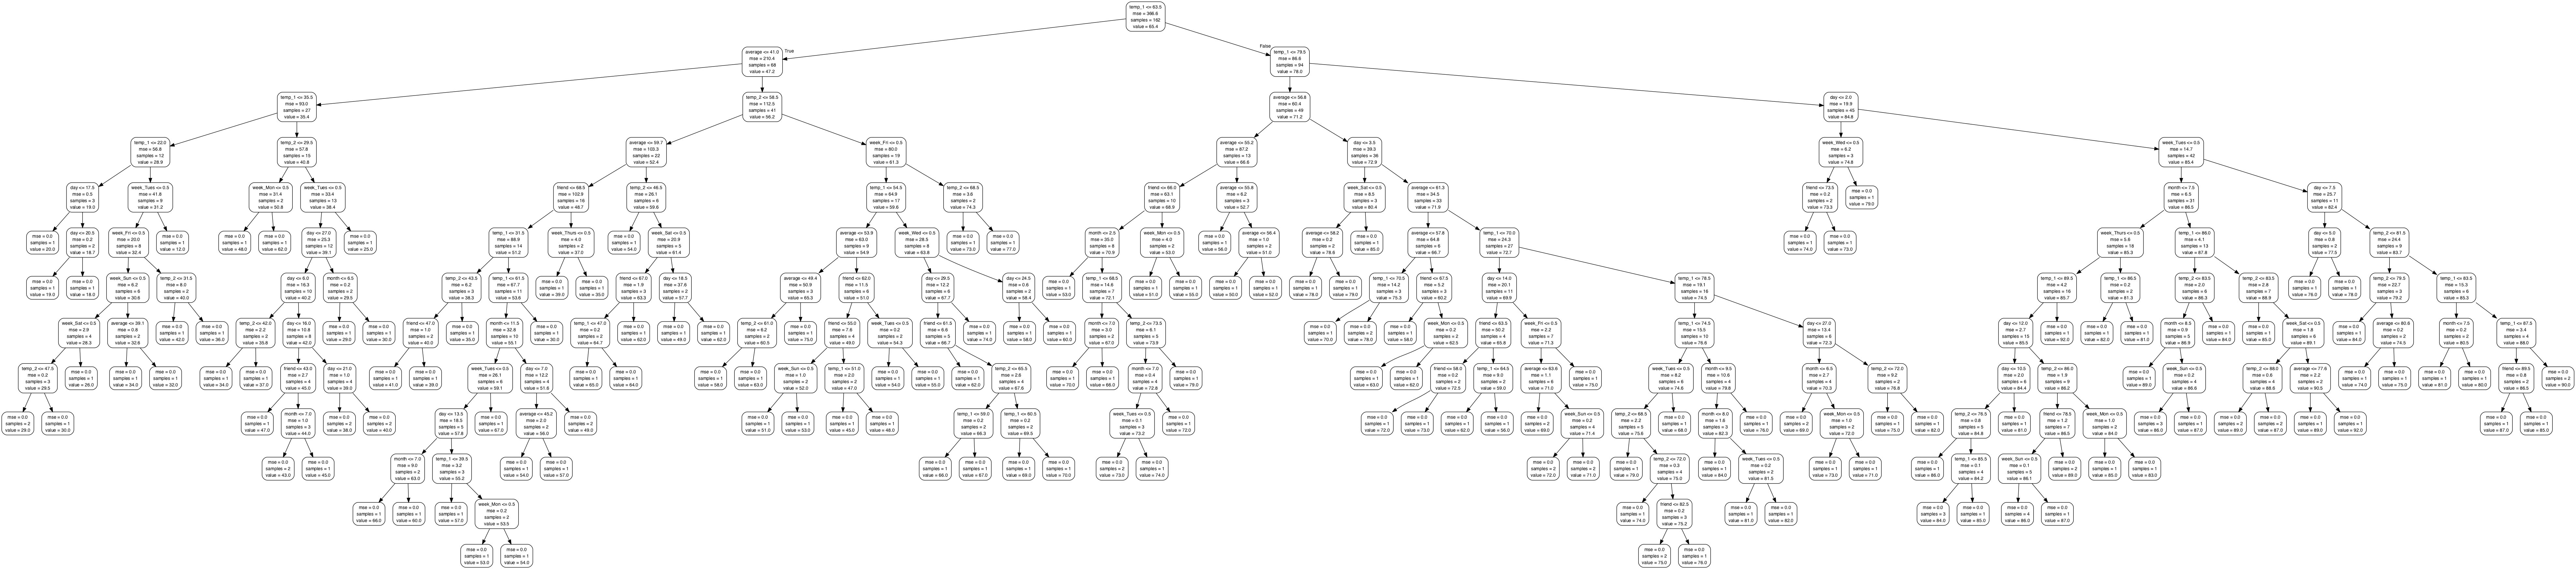

This is the graph generated by the data

### Get Important Features

In [131]:
# Get numerical feature importances
imp_features = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, imp_features)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Var: {:10} Importance: {}'.format(*pair)) for pair in feature_importances];

Var: temp_1     Importance: 0.54
Var: average    Importance: 0.34
Var: day        Importance: 0.03
Var: temp_2     Importance: 0.03
Var: friend     Importance: 0.03
Var: month      Importance: 0.01
Var: week_Tues  Importance: 0.01
Var: year       Importance: 0.0
Var: week_Fri   Importance: 0.0
Var: week_Mon   Importance: 0.0
Var: week_Sat   Importance: 0.0
Var: week_Sun   Importance: 0.0
Var: week_Thurs Importance: 0.0
Var: week_Wed   Importance: 0.0


Using the random forest algorithm, we can determine which features are actually important to the data set. As seen above, the features with the strongest correlation seem to be the temperature from the day before and the average temperatures normally

### Two Most important Features

In [132]:
# We can create a new Random Forest using only the 2 most important variables
# This will hopefully lead to a more accurate prediction
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Extract the two most important features
important_indices = [feature_list.index('temp_1'), feature_list.index('average')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

# Train the random forest
rf_most_important.fit(train_important, train_labels)

# Make predictions and determine the error
predict = rf_most_important.predict(test_important)

err2 = abs(predict - test_labels)

# Display the performance metrics
print('Mean Absolute Error:', np.mean(err2), 'deg.')

me= np.mean(100 * (errors / test_labels))
accuracy = 100 - me

print('Accuracy:', accuracy, '%.')

Mean Absolute Error: 6.20615550082 deg.
Accuracy: 88.6285780448 %.


As you can see, the accuracy is about the same.

## Visualization

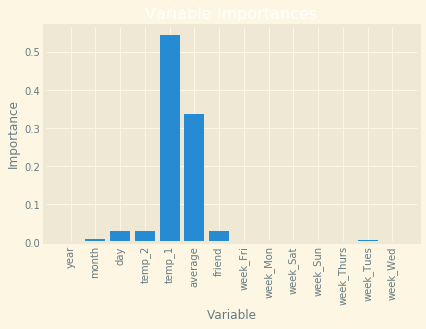

In [133]:
%matplotlib inline

# Set the style
plt.style.use('Solarize_Light2')

# x values we want plotted
x_values = list(range(len(importances)))

# Bar Chart
plt.bar(x_values, importances, orientation = 'vertical')

# Add labels to the x-axis 
plt.xticks(x_values, feature_list, rotation='vertical')

# Label the title and the x and y axis
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 

We can use datatime objects to get more visualizations of our data

In [134]:
# Dates of training values
months = features[:, feature_list.index('month')]
days = features[:, feature_list.index('day')]
years = features[:, feature_list.index('year')]

# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})

# Dates of predictions
months = test_features[:, feature_list.index('month')]
days = test_features[:, feature_list.index('day')]
years = test_features[:, feature_list.index('year')]

# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]

# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]

# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions}) 

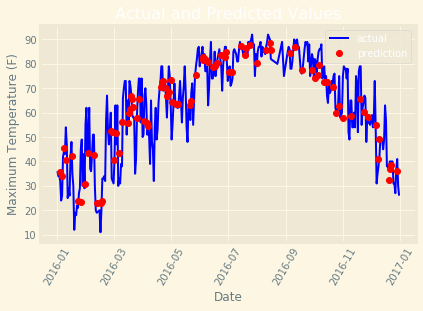

In [135]:
# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')

# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()

# Graph labels
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values');


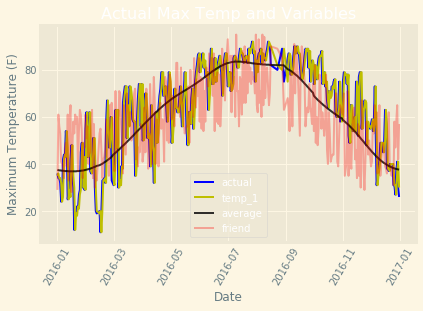

In [136]:
# Make the data accessible for plotting
true_data['temp_1'] = features[:, feature_list.index('temp_1')]
true_data['average'] = features[:, feature_list.index('average')]
true_data['friend'] = features[:, feature_list.index('friend')]

# Plot all the data as lines
plt.plot(true_data['date'], true_data['actual'], 'b-', label  = 'actual', alpha = 1.0)
plt.plot(true_data['date'], true_data['temp_1'], 'y-', label  = 'temp_1', alpha = 1.0)
plt.plot(true_data['date'], true_data['average'], 'k-', label = 'average', alpha = 0.8)
plt.plot(true_data['date'], true_data['friend'], 'r-', label = 'friend', alpha = 0.3)

# Formatting plot
plt.legend(); plt.xticks(rotation = '60');

# Lables and title
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual Max Temp and Variables');